# Simulation Assignment
Joseph Denby  
MACSS 30000  
11/6/17  


## Question 1
First, I'll import the appropriate packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats
from matplotlib.ticker import MultipleLocator

Next, I'll define the parameters according to this question's formulation using a dictionary.

In [2]:
p = {'st_year': 2019, 'g': .03, 'rho': .2, 'inc_0': 80000, 'num_years':40, 'num_draws':10000, 'sd': 0.1, 'mean': 0}

Now, here's the definition of the function that returns a matrix of representing 10,000 independent simulations of income over the defined 40 year span.

In [3]:
def wealth_sim(p):
    
    np.random.seed(42)
    
    normal_errors = np.random.normal(p['mean'], p['sd'], (p['num_years'], p['num_draws']))
    
    ln_wealth_mat = np.zeros((p['num_years'], p['num_draws']))
    
    ln_wealth_mat[0, :] = np.log(p['inc_0']) + normal_errors[0, :]
    
    for yr in range(1, p['num_years']):
        ln_wealth_mat[yr, :] = ((1 - p['rho']) * (np.log(p['inc_0']) + p['g']*(yr))) +\
        p['rho']*ln_wealth_mat[yr-1, :] + normal_errors [yr, :]
        
    wealth_mat = np.exp(ln_wealth_mat)
    
    return wealth_mat
    

In [4]:
wealth_matrix = wealth_sim(p)

Here's a plot of one simulation.

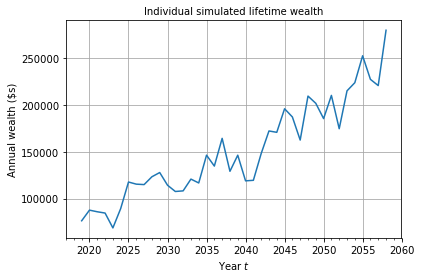

In [5]:
%matplotlib inline
year_vec = np.arange(p['st_year'], p['st_year'] + p['num_years'])
individual = 505
fig, ax = plt.subplots()
plt.plot(year_vec, wealth_matrix[:, individual])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Individual simulated lifetime wealth', fontsize=10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual wealth (\$s)')

## Question 2
Plot a histogram with 50 bins of year $t$ = 2019 initial income for each of the 10,000 simulations. What percent of your class will earn more than \$100,000 in the first year out of the program? What percent of the class will earn less than \$70,000? Is the distribution normally distributed (i.e. symmetric and bell-curved)?

In [6]:
start_income = wealth_matrix[0, :]
mean = np.mean(start_income)
sd = np.sqrt(np.var(start_income))

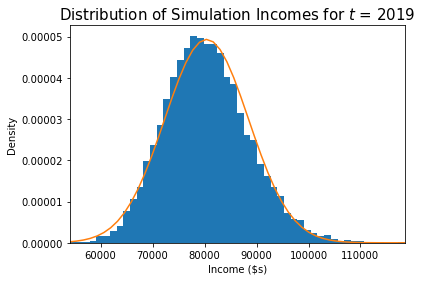

In [7]:
%matplotlib inline
plt.hist(start_income, 50, normed = True)
plt.xlim((min(start_income)), max(start_income))
x = np.linspace(min(start_income), max(start_income), 50)
plt.plot(x, mlab.normpdf(x, mean, sd))
plt.xlabel(r'Income (\$s)')
plt.ylabel(r'Density')
plt.title('Distribution of Simulation Incomes for $t$ = 2019', fontsize = 15)

Based on the histogram and fitted normal probability density function, the incomes do appear to be distributed normally. As such, computing the percentage of the class earning less than \$70,000 or more than \$100,000 is simple.

In [8]:
stats.percentileofscore(start_income, 70000)


9.3300000000000001

In [9]:
100 - stats.percentileofscore(start_income, 100000)

1.25

Based on the above calculations, there is approximately a 9% chance of earning less than \$70,000 and approximately a  1.25% chance of earning more than \$100,000 according to this simulation.


## Question 3

Suppose you graduate from the MACSS program with \$95,000 of zero-interest debt. You will use 10% of your annual salary after you graduate to pay off this loan. Plot the histogram of how many years it takes to pay off the loan in each of your 10,000 simulations. This histogram will only have as many bins as you have unique years in which people pay off their debt. In what percent of the simulations are you able to pay off the loan in 10 years (on or before $t$ = 2028)?

In [10]:
debt_mat = np.zeros(p['num_draws'])
debt = 95000
rate = .10
for s in range(p['num_draws']):
    current_debt = debt
    for y in range(p['num_years']):
        current_debt -= rate*wealth_matrix[y, s]
        if current_debt <= 0:
            debt_mat[s] = y + p['st_year']
            break

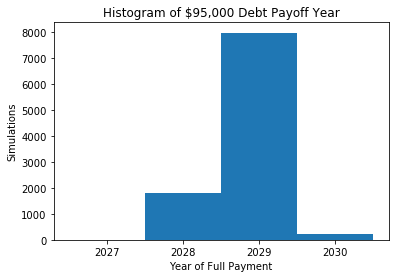

In [11]:
plt.hist(debt_mat, 
         bins = np.arange(min(debt_mat)-.5, max(debt_mat) +1, 1))
plt.xlabel(r'Year of Full Payment')
plt.ylabel(r'Simulations')
plt.xticks(np.arange(debt_mat.min(), debt_mat.max() + 1))
plt.title('Histogram of \$95,000 Debt Payoff Year')

In [12]:
percent_10 = len(debt_mat[debt_mat > 2028])/len(debt_mat)
100 - (percent_10 * 100)

18.179999999999993

Approximately 18% of simulations are able to pay down the full debt in 10 or fewer years. 

## Question 4
Now suppose that the UChicago MACSS program becomes very well known in the next year, and the skills you are learning are demanded more by employers. This increases the average starting salary to $inc_0$ = \$85, 000, but the standard deviation in incomes increases also to $\sigma$ = 0.15. Plot the new histogram of how many years it takes to pay off your loan of \$95,000 in your new 10,000 simulations with the new standard deviation and the new average initial salary. In what percent of the simulations are you able to pay off the loan in 10 years (on or before $t$ = 2028)?

First, I'll define a new dictionary with the new values for average starting salary and standard deviation.

In [13]:
q = {'st_year': 2019, 'g': .03, 'rho': .2, 'inc_0': 85000, 'num_years':40, 'num_draws':10000, 'sd': 0.15, 'mean': 0}

Now, I can create a new matrix using the old function. 

In [14]:
new_wealth_mat = wealth_sim(q)

Using this new wealth matrix, I can compute how many years it takes for each simulation to pay down the \$95,000 debt.

In [15]:
debt_mat = np.zeros(p['num_draws'])
debt = 95000
rate = .10
for s in range(p['num_draws']):
    current_debt = debt
    for y in range(p['num_years']):
        current_debt -= rate*new_wealth_mat[y, s]
        if current_debt <= 0:
            debt_mat[s] = int(y) + p['st_year']
            break

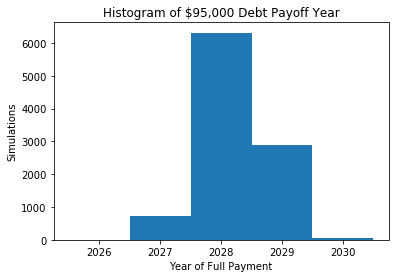

In [16]:
plt.hist(debt_mat, 
         bins = np.arange(min(debt_mat)-.5, max(debt_mat) +1, 1))
plt.xlabel(r'Year of Full Payment')
plt.ylabel(r'Simulations')
plt.xticks(np.arange(debt_mat.min(), debt_mat.max() + 1))
plt.title('Histogram of \$95,000 Debt Payoff Year')

In [17]:
percent_10 = len(debt_mat[debt_mat > 2028])/len(debt_mat)

In [18]:
100 - (percent_10 * 100)

70.34

Approximately 70% of simulations are able to pay down the full debt in 10 or fewer years.